In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv("american_bankruptcy.csv")

In [ ]:
df.describe()

year             X1             X2            X3            X4  \
count  78682.000000   78682.000000   78682.000000  78682.000000  78682.000000   
mean    2007.506317     880.362485    1594.529029    121.234256    376.759424   
std        5.742768    3928.564794    8930.484664    652.376804   2012.023142   
min     1999.000000      -7.760000    -366.645000      0.000000 -21913.000000   
25%     2002.000000      18.924000      17.038250      1.192000     -0.811000   
50%     2007.000000     100.449500     103.661000      7.929500     15.034500   
75%     2012.000000     431.526750     634.548000     47.971750    139.655250   
max     2018.000000  169662.000000  374623.000000  28430.000000  81730.000000   

                 X5             X6            X7            X8             X9  \
count  78682.000000   78682.000000  78682.000000  7.868200e+04   78682.000000   
mean     201.605717     129.382453    286.832743  3.414355e+03    2364.019706   
std     1060.766096    1265.532022   1335.978571  1.841410e+04   11950.068842   
min        0.000000  -98696.000000     -0.006000  1.000000e-04   -1964.999000   
25%        0.000000      -7.415750      3.281250  3.498000e+01      27.548500   
50%        7.023000       1.616000     22.820000  2.275118e+02     186.598500   
75%       74.747250      40.144250    131.580500  1.244890e+03    1046.402500   
max    62567.000000  104821.000000  65812.000000  1.073391e+06  511729.000000   

                 X10            X11           X12            X13  \
count   78682.000000   78682.000000  78682.000000   78682.000000   
mean     2867.110620     722.483710    255.525035     769.490783   
std     12917.944421    3242.170946   1494.643534    3774.703114   
min         0.001000      -0.023000 -25913.000000  -21536.000000   
25%        37.363500       0.000000     -2.787000       8.521250   
50%       213.203500       7.593500      6.518000      63.581500   
75%      1171.364750     248.760750     87.599000     344.074250   
max    531864.000000  166250.000000  71230.000000  137106.000000   

                 X14            X15            X16            X17  \
count   78682.000000   78682.000000   78682.000000   78682.000000   
mean      610.072255     532.467069    2364.019706    1773.563963   
std      2938.387443    6369.159440   11950.068842    8053.684902   
min         0.001000 -102362.000000   -1964.999000       0.001000   
25%         8.889250     -68.282750      27.548500      13.486000   
50%        43.333000      -1.131000     186.598500      81.988000   
75%       222.817000     146.070000    1046.402500     629.975000   
max    116866.000000  402089.000000  511729.000000  337980.000000   

                 X18  
count   78682.000000  
mean     1987.260307  
std     10419.629038  
min      -317.197000  
25%        32.872500  
50%       168.912000  
75%       875.522250  
max    481580.000000

### Renaming columns with the actual column names to make it more readable

In [ ]:
new_column_names = {
    'X1': 'Current assets',
    'X2': 'Cost of goods sold',
    'X3': 'Depreciation and amortization',
    'X4': 'EBITDA',
    'X5': 'Inventory',
    'X6': 'Net Income',
    'X7': 'Total Receivables',
    'X8': 'Market Value',
    'X9': 'Net Sales',
    'X10': 'Total Assets',
    'X11': 'Total Long-term Debt',
    'X12': 'EBIT',
    'X13': 'Gross Profit',
    'X14': 'Total Current Liabilities',
    'X15': 'Retained Earnings',
    'X16': 'Total Revenue',
    'X17': 'Total Liabilities',
    'X18': 'Total Operating Expenses'
}

df.rename(columns=new_column_names, inplace=True)

In [ ]:
df.shape

(78682, 21)

alive     73462
failed     5220
Name: status_label, dtype: int64


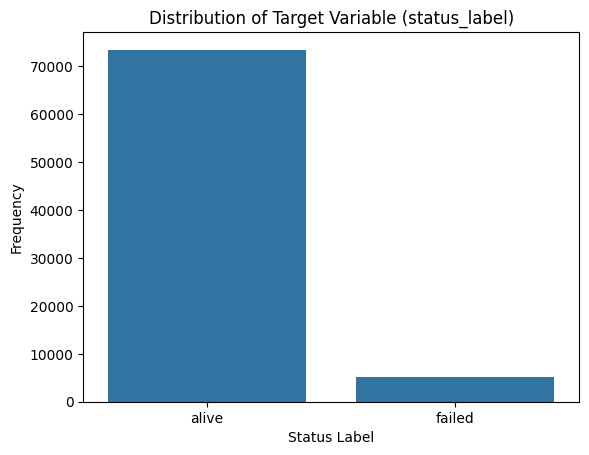

In [ ]:
distribution = df['status_label'].value_counts()
print(distribution)

# Visualize the distribution of the 'status_label' column
sns.countplot(x='status_label', data=df)

plt.title('Distribution of Target Variable (status_label)')
plt.xlabel('Status Label')
plt.ylabel('Frequency')
plt.show()

# Data Summary and Cleaning

In [ ]:
# Step 1: Summary Statistics
summary_statistics = df.describe()
print(summary_statistics)

               year  Current assets  Cost of goods sold  \
count  78682.000000    78682.000000        78682.000000   
mean    2007.506317      880.362485         1594.529029   
std        5.742768     3928.564794         8930.484664   
min     1999.000000       -7.760000         -366.645000   
25%     2002.000000       18.924000           17.038250   
50%     2007.000000      100.449500          103.661000   
75%     2012.000000      431.526750          634.548000   
max     2018.000000   169662.000000       374623.000000   

       Depreciation and amortization        EBITDA     Inventory  \
count                   78682.000000  78682.000000  78682.000000   
mean                      121.234256    376.759424    201.605717   
std                       652.376804   2012.023142   1060.766096   
min                         0.000000 -21913.000000      0.000000   
25%                         1.192000     -0.811000      0.000000   
50%                         7.929500     15.034500      7.02

In [ ]:
# Step 2: Handling Missing Values
# Identify missing values
missing_values = df.isnull().sum()
print(missing_values)

company_name                     0
status_label                     0
year                             0
Current assets                   0
Cost of goods sold               0
Depreciation and amortization    0
EBITDA                           0
Inventory                        0
Net Income                       0
Total Receivables                0
Market Value                     0
Net Sales                        0
Total Assets                     0
Total Long-term Debt             0
EBIT                             0
Gross Profit                     0
Total Current Liabilities        0
Retained Earnings                0
Total Revenue                    0
Total Liabilities                0
Total Operating Expenses         0
dtype: int64


In [ ]:
# Step 3: Detecting and Handling Outliers
# For simplicity, we'll use the IQR method to detect and handle outliers for numerical columns

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Display the dataframe info to check the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net Sales                      78682 non-null  float64
 12  Total Assets                   78682 non-null 

# Feature Engineering:



*   **Ratio Features**: Created new features based on financial ratios to capture aspects of liquidity, profitability, and leverage, which are essential for assessing a company's financial health and operational efficiency.





In [ ]:
# Liquidity Ratios
df['Current Ratio'] = df['Current assets'] / df['Total Current Liabilities']
df['Quick Ratio'] = (df['Current assets'] - df['Inventory']) / df['Total Current Liabilities']

# Profitability Ratios
df['ROA'] = df['Net Income'] / df['Total Assets']
df['ROE'] = df['Net Income'] / df['Retained Earnings']
df['Gross Margin'] = df['Gross Profit'] / df['Net Sales']
df['EBITDA Margin'] = df['EBITDA'] / df['Net Sales']

# Leverage Ratios
df['Debt-to-Equity Ratio'] = df['Total Liabilities'] / df['Retained Earnings']
df['Debt Ratio'] = df['Total Liabilities'] / df['Total Assets']

In [ ]:
df

company_name status_label  year  Current assets  Cost of goods sold  \
0              C_1        alive  1999         511.267             833.107   
1              C_1        alive  2000         485.856             713.811   
2              C_1        alive  2001         436.656             526.477   
3              C_1        alive  2002         396.412             496.747   
4              C_1        alive  2003         432.204             523.302   
...            ...          ...   ...             ...                 ...   
78677       C_8971        alive  2014         233.211              43.338   
78678       C_8971        alive  2015         105.559              59.184   
78679       C_8971        alive  2016          63.971              69.074   
78680       C_8971        alive  2017         135.207              66.527   
78681       C_8971        alive  2018          82.589              68.817   

       Depreciation and amortization   EBITDA   Inventory  Net Income  \
0                             18.373   89.031  186.868125    35.16300   
1                             18.577   64.367  186.868125    18.53100   
2                             22.496   27.207  186.868125   -58.93900   
3                             27.172   30.745  186.868125   -12.41000   
4                             26.680   47.491  186.868125     3.50400   
...                              ...      ...         ...         ...   
78677                         14.094   45.615    3.376000    25.26100   
78678                         42.592  202.133    2.288000   111.48425   
78679                         65.057   79.051    2.581000    -1.44200   
78680                         65.330   69.171    2.013000   -20.40100   
78681                         65.201   67.262    2.112000   -50.94600   

       Total Receivables  ...  Total Liabilities  Total Operating Expenses  \
0                128.348  ...            401.483                   935.302   
1                115.187  ...            361.642                   809.888   
2                 77.528  ...            399.964                   611.514   
3                 66.322  ...            391.633                   575.592   
4                104.661  ...            407.608                   604.467   
...                  ...  ...                ...                       ...   
78677             22.846  ...            225.887                    58.608   
78678             54.611  ...            880.327                    89.020   
78679             42.467  ...            770.233                    90.807   
78680             27.217  ...            776.697                    92.713   
78681             45.839  ...            712.687                    93.251   

       Current Ratio  Quick Ratio       ROA       ROE  Gross Margin  \
0           3.120983     1.980264  0.047454  0.174918      0.186683   
1           3.874697     2.384425  0.026403  0.090809      0.183521   
2           2.902063     1.660117 -0.082989 -0.422190      0.175732   
3           1.947253     1.029320 -0.018074 -0.099995      0.180741   
4           3.292707     1.869069  0.004940  0.026569      0.197338   
...              ...          ...       ...       ...           ...   
78677       8.270773     8.151044  0.022983  0.899128      0.584180   
78678       1.197792     1.171830  0.059747  0.706567      0.796725   
78679       0.745887     0.715793 -0.000826 -0.009223      0.593343   
78680       1.648665     1.624119 -0.011751 -0.150072      0.589045   
78681       1.040622     1.014011 -0.031344 -0.599400      0.571268   

       EBITDA Margin  Debt-to-Equity Ratio  Debt Ratio  
0           0.086916              1.997170    0.541814  
1           0.073625              1.772190    0.515267  
2           0.042596              2.865010    0.563172  
3           0.050706              3.155633    0.570377  
4           0.072844              3.090655    0.574669  
...              ...                   ...         ...  
78677       0.4

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_name                   78682 non-null  object 
 1   status_label                   78682 non-null  object 
 2   year                           78682 non-null  int64  
 3   Current assets                 78682 non-null  float64
 4   Cost of goods sold             78682 non-null  float64
 5   Depreciation and amortization  78682 non-null  float64
 6   EBITDA                         78682 non-null  float64
 7   Inventory                      78682 non-null  float64
 8   Net Income                     78682 non-null  float64
 9   Total Receivables              78682 non-null  float64
 10  Market Value                   78682 non-null  float64
 11  Net Sales                      78682 non-null  float64
 12  Total Assets                   78682 non-null 

## Analyzing the Distribution of the Target Variable

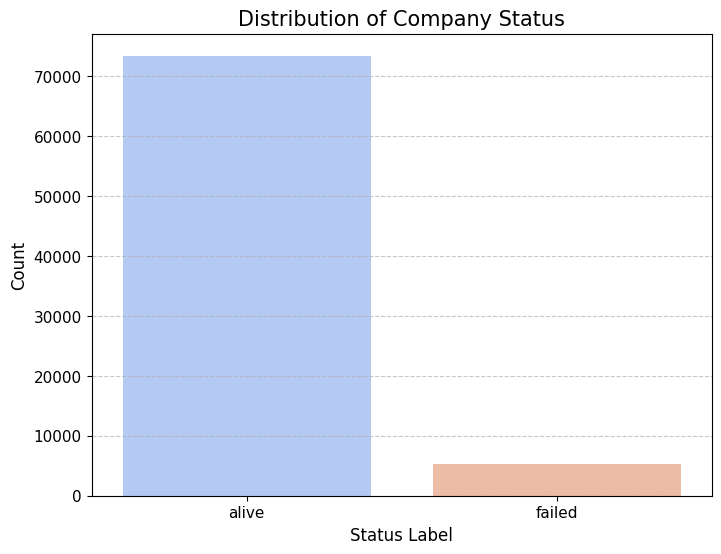

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status_label', hue='status_label', palette='coolwarm', dodge=False)
plt.title('Distribution of Company Status', fontsize=15)
plt.xlabel('Status Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)  # Hides the legend
plt.show()

The graphic exhibits a conspicuous disparity between the two classes. The number of enterprises classified as "active" significantly exceeds the number of companies classified as "failed." It is necessary to consider the imbalance in this dataset when conducting any predictive modelling. This can be addressed by employing approaches like resampling, altered class weights, or specialised evaluation metrics.

## Summary Statistics for Financial Indicators

Calculating summary statistics for both the initial financial indicators and the resultant ratios will offer valuable information on their distributions, central tendencies, and variability.

In [ ]:
df.describe().transpose()

count         mean          std  \
year                           78682.0  2007.506317     5.742768   
Current assets                 78682.0   291.821897   371.860302   
Cost of goods sold             78682.0   419.341971   567.101698   
Depreciation and amortization  78682.0    31.601546    42.739387   
EBITDA                         78682.0    85.296883   134.826713   
Inventory                      78682.0    48.397071    70.109398   
Net Income                     78682.0    16.928860    52.738363   
Total Receivables              78682.0    86.688958   116.715093   
Market Value                   78682.0   828.385851  1104.696439   
Net Sales                      78682.0   693.939060   928.905397   
Total Assets                   78682.0   779.223544  1039.197797   
Total Long-term Debt           78682.0   155.854751   236.892360   
EBIT                           78682.0    49.391365    90.984129   
Gross Profit                   78682.0   226.679162   307.657689   
Total Current Liabilities      78682.0   149.849926   196.978676   
Retained Earnings              78682.0    43.613270   241.956023   
Total Revenue                  78682.0   693.939060   928.905397   
Total Liabilities              78682.0   414.042594   575.693780   
Total Operating Expenses       78682.0   584.219994   768.848746   
Current Ratio                  78682.0     3.518205    88.746433   
Quick Ratio                    78682.0     3.056772    88.739887   
ROA                            78682.0    -0.679024    13.599214   
ROE                            78682.0     0.332070    17.265149   
Gross Margin                   78682.0    -6.327961   208.695995   
EBITDA Margin                  78682.0    -8.506350   198.611803   
Debt-to-Equity Ratio           78682.0     1.905164   173.168540   
Debt Ratio                     78682.0     1.903534    46.442275   

                                        min          25%          50%  \
year                            1999.000000  2002.000000  2007.000000   
Current assets                    -7.760000    18.924000   100.449500   
Cost of goods sold              -366.645000    17.038250   103.661000   
Depreciation and amortization      0.000000     1.192000     7.929500   
EBITDA                          -211.510375    -0.811000    15.034500   
Inventory                          0.000000     0.000000     7.023000   
Net Income                       -78.755750    -7.415750     1.616000   
Total Receivables                 -0.006000     3.281250    22.820000   
Market Value                       0.000100    34.980000   227.511850   
Net Sales                      -1500.732500    27.548500   186.598500   
Total Assets                       0.001000    37.363500   213.203500   
Total Long-term Debt              -0.023000     0.000000     7.593500   
EBIT                            -138.366000    -2.787000     6.518000   
Gross Profit                    -494.808250     8.521250    63.581500   
Total Current Liabilities          0.001000     8.889250    43.333000   
Retained Earnings               -389.811875   -68.282750    -1.131000   
Total Revenue                  -1500.732500    27.548500   186.598500   
Total Liabilities                  0.001000    13.486000    81.988000   
Total Operating Expenses        -317.197000    32.872500   168.912000   
Current Ratio                    -12.721311     1.317980     1.931974   
Quick Ratio                      -12.983607     0.984040     1.588282   
ROA                            -1515.000000    -0.115975     0.019601   
ROE                            -1344.625000     0.022557     0.174237   
Gross Margin                  -29325.700000     0.222944     0.329129   
EBITDA Margin                 -28202.000000    -0.044895     0.089381   
Debt-to-Equity Ratio           -8397.094017    -0.544277    -0.016810   
Debt Ratio                         0.000041     0.306850     0.532008   

                                       75%           max  
year                    

<ipython-input-43-f5f268c48c31>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


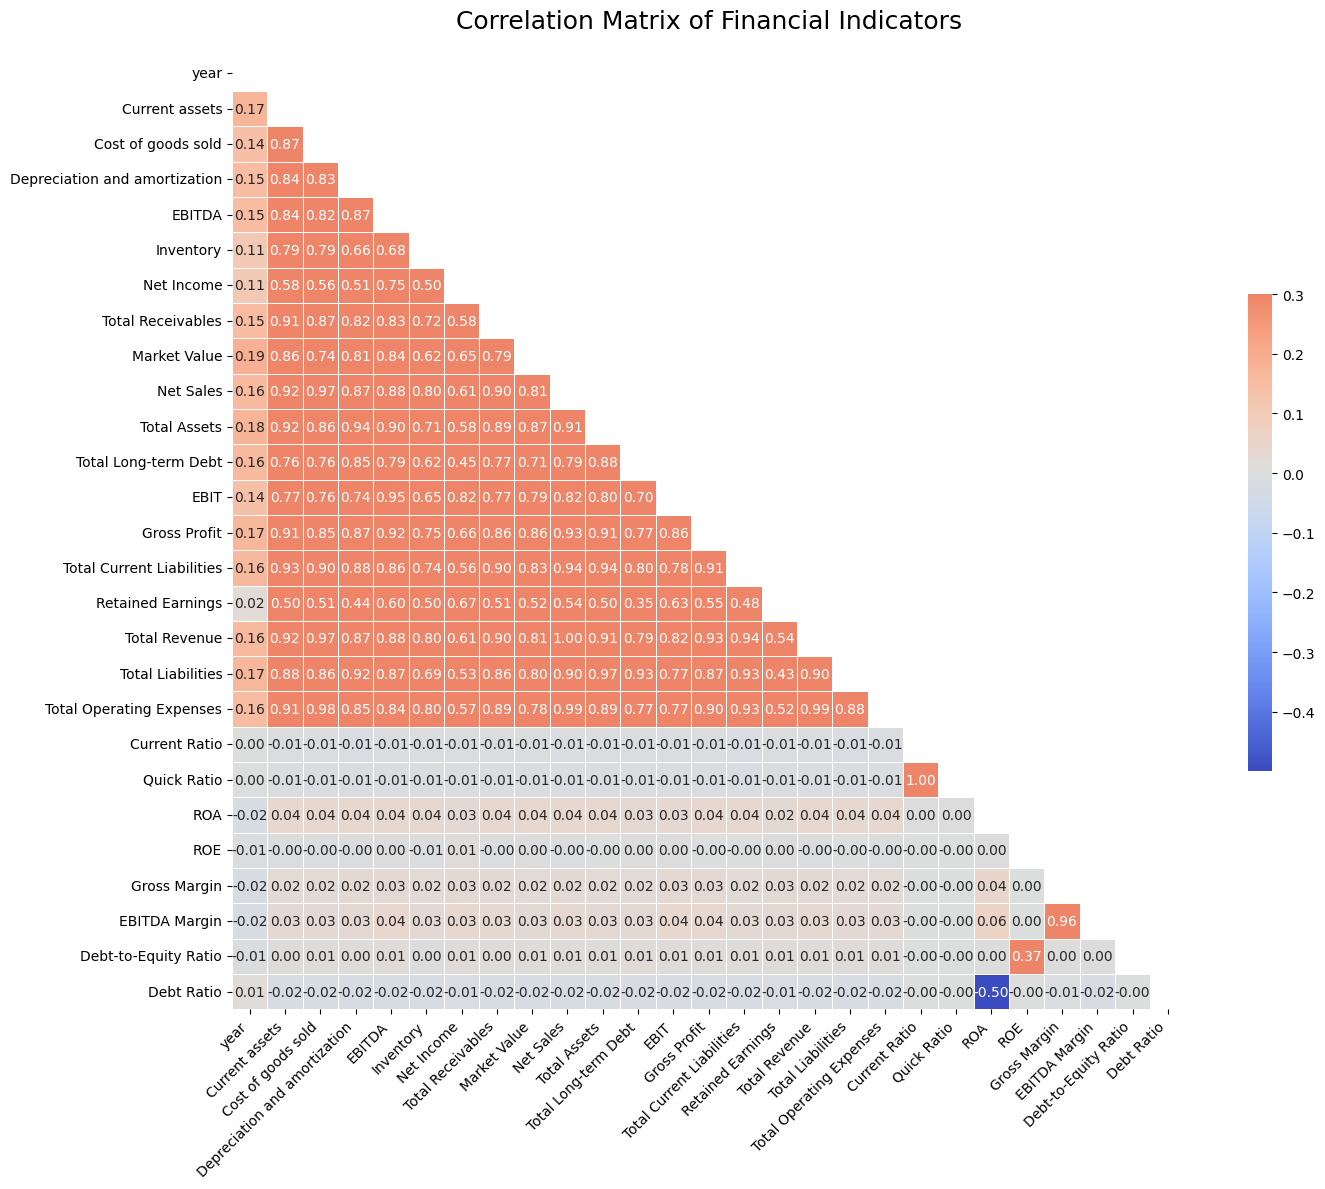

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Compute the correlation matrix, which is symmetric
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

# Ensure the axis ticks are readable
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add a title to the heatmap
plt.title('Correlation Matrix of Financial Indicators', fontsize=18, pad=20)

# Show the plot
plt.tight_layout()
plt.show()

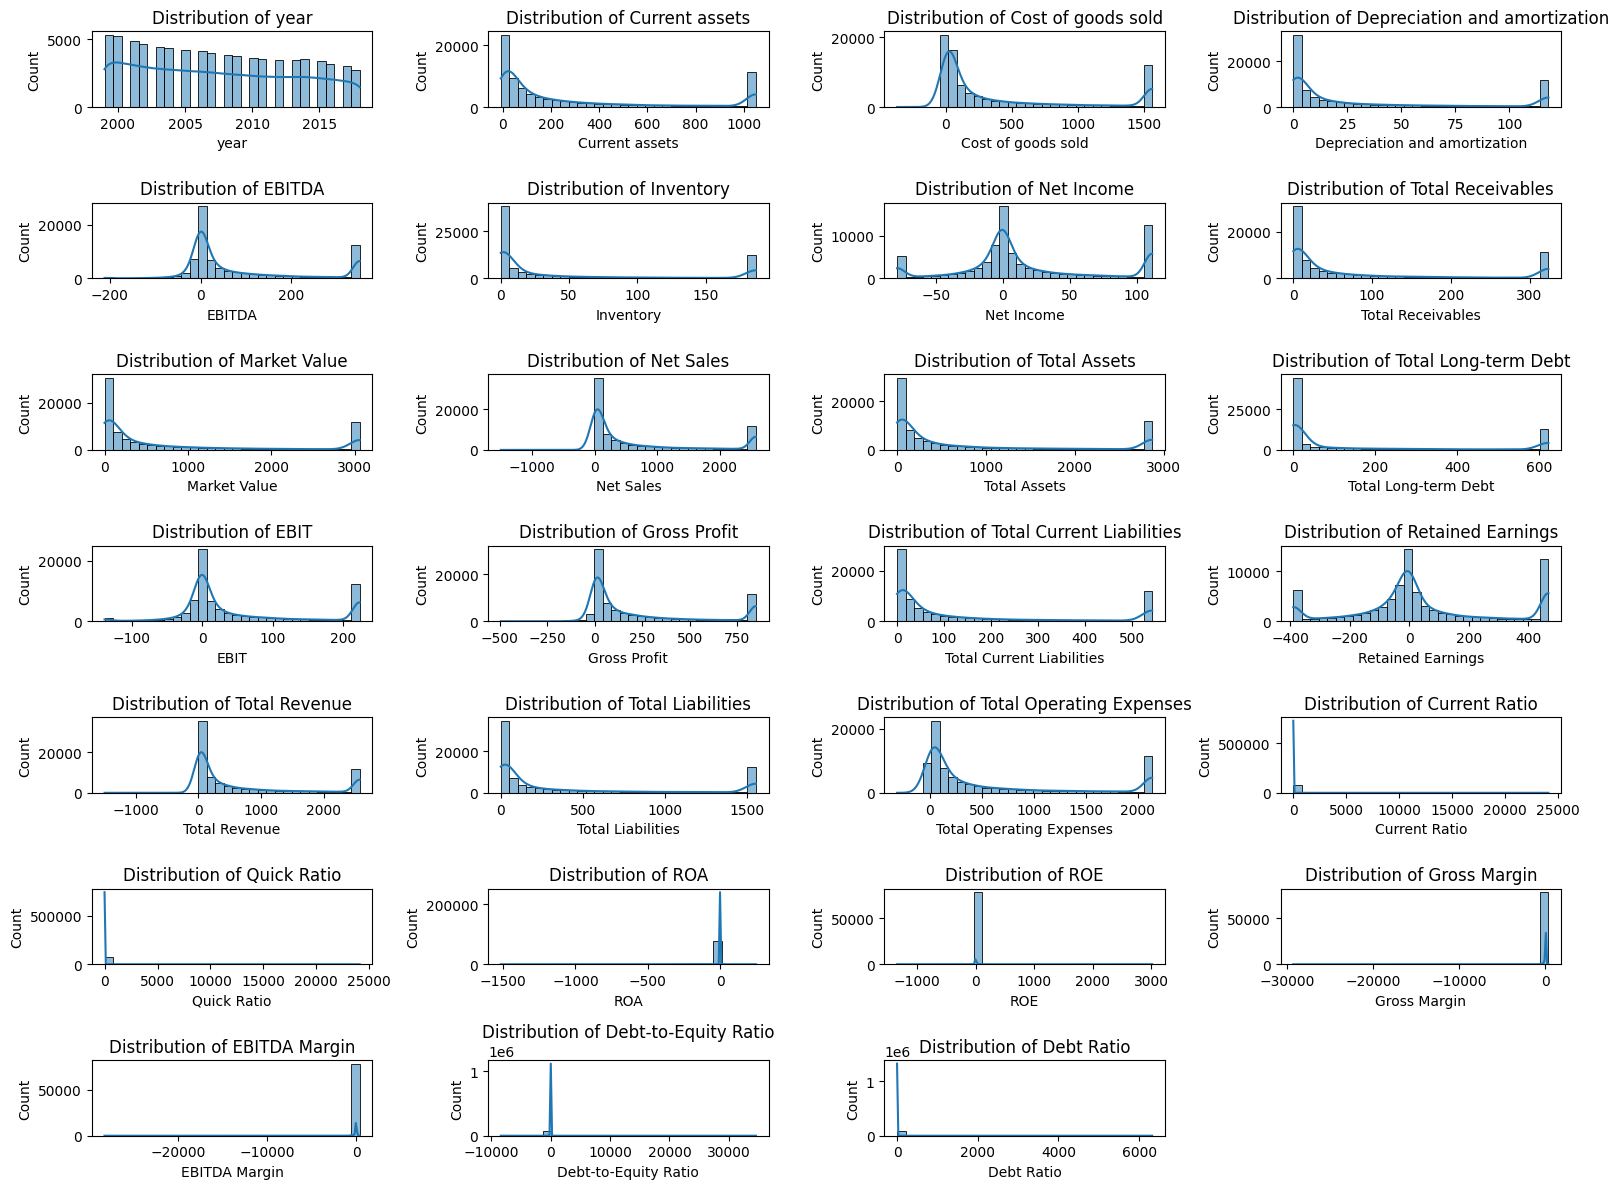

In [ ]:
# Extract relevant numerical columns (excluding 'year' and 'status_label')
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up subplots for better visualization
num_cols_per_row = 4
num_rows = len(numerical_columns) // num_cols_per_row + 1

plt.figure(figsize=(16, 12))

# Plot histograms or density plots for each numerical column
for i, col in enumerate(numerical_columns):
    plt.subplot(num_rows, num_cols_per_row, i+1)

    # Histogram:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')


plt.tight_layout()
plt.show()

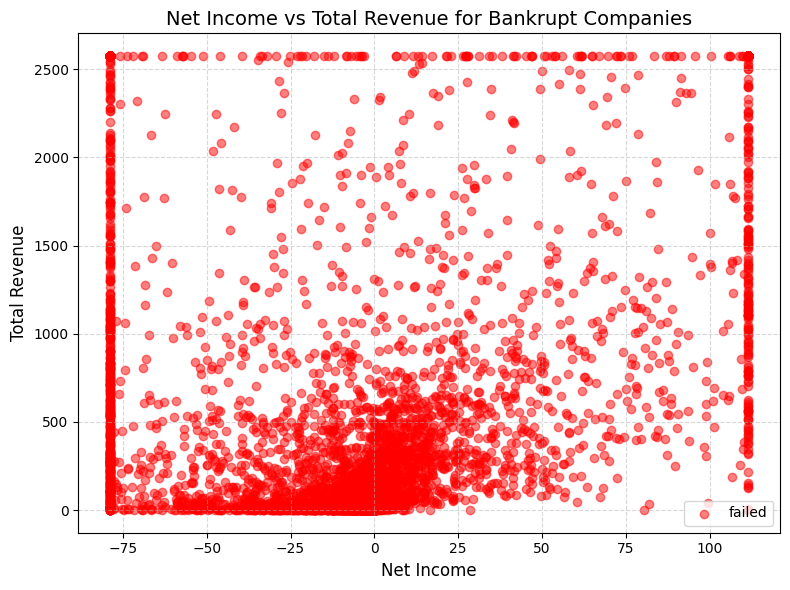

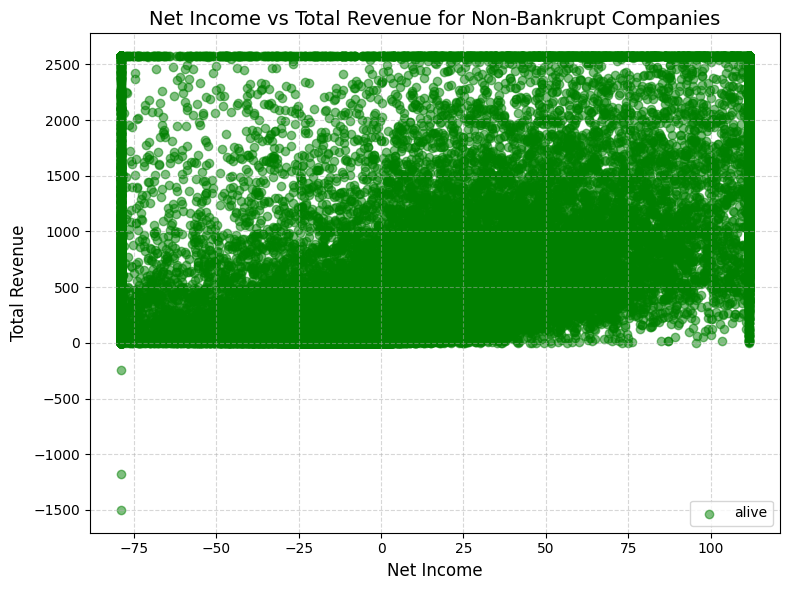

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['Net Income'], df[df['status_label'] == 'failed']['Total Revenue'], alpha=0.5, label='failed', c='red')
plt.title('Net Income vs Total Revenue for Bankrupt Companies', fontsize=14)
plt.xlabel('Net Income', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['Net Income'], df[df['status_label'] == 'alive']['Total Revenue'], alpha=0.5, label='alive', c='green')
plt.title('Net Income vs Total Revenue for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('Net Income', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


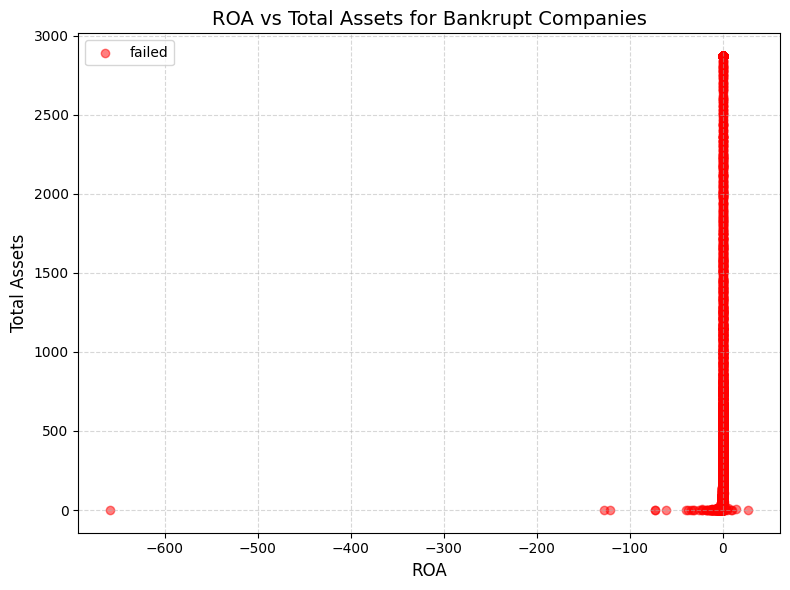

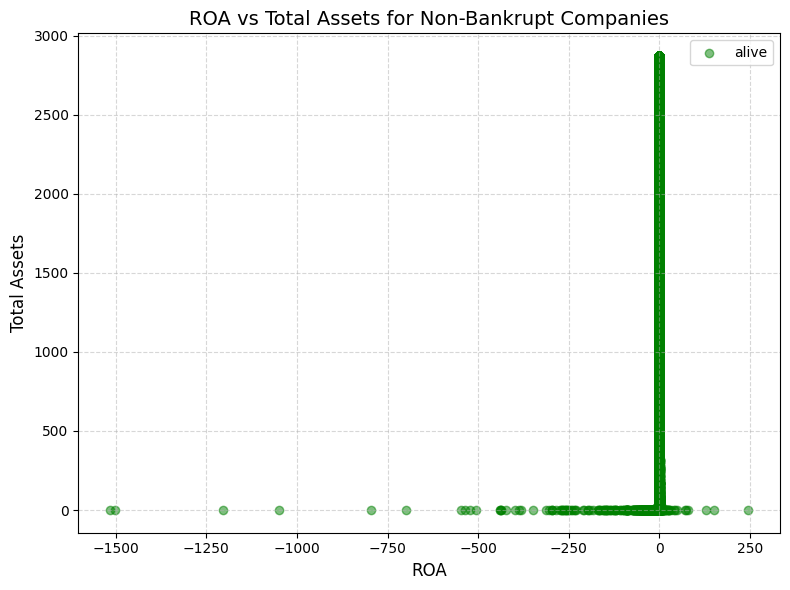

In [ ]:
# Ratio Metrics - ROA vs. Total Assets:
plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['ROA'], df[df['status_label'] == 'failed']['Total Assets'], alpha=0.5, label='failed', c='red')
plt.title('ROA vs Total Assets for Bankrupt Companies', fontsize=14)
plt.xlabel('ROA', fontsize=12)
plt.ylabel('Total Assets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['ROA'], df[df['status_label'] == 'alive']['Total Assets'], alpha=0.5, label='alive', c='green')
plt.title('ROA vs Total Assets for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('ROA', fontsize=12)
plt.ylabel('Total Assets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

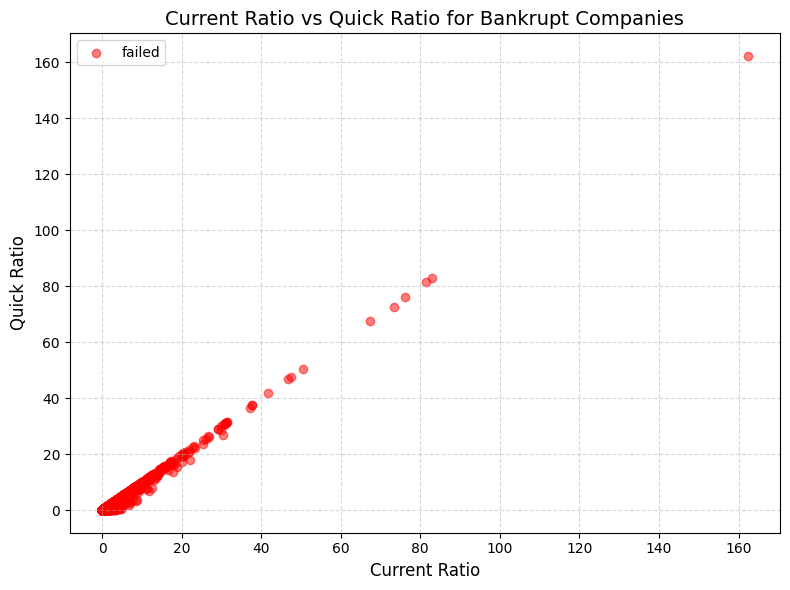

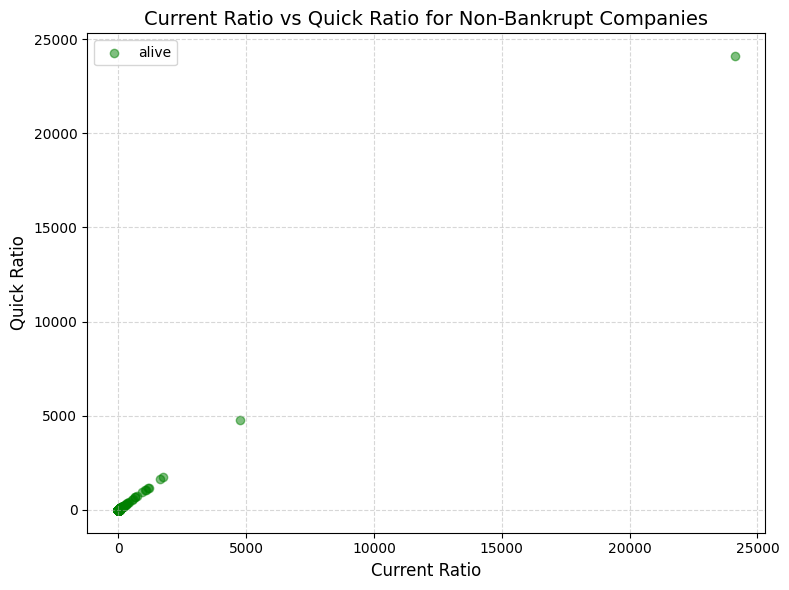

In [ ]:
# Liquidity and Solvency - Current Ratio vs. Quick Ratio:

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['Current Ratio'], df[df['status_label'] == 'failed']['Quick Ratio'], alpha=0.5, label='failed', c='red')
plt.title('Current Ratio vs Quick Ratio for Bankrupt Companies', fontsize=14)
plt.xlabel('Current Ratio', fontsize=12)
plt.ylabel('Quick Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['Current Ratio'], df[df['status_label'] == 'alive']['Quick Ratio'], alpha=0.5, label='alive', c='green')
plt.title('Current Ratio vs Quick Ratio for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('Current Ratio', fontsize=12)
plt.ylabel('Quick Ratio', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

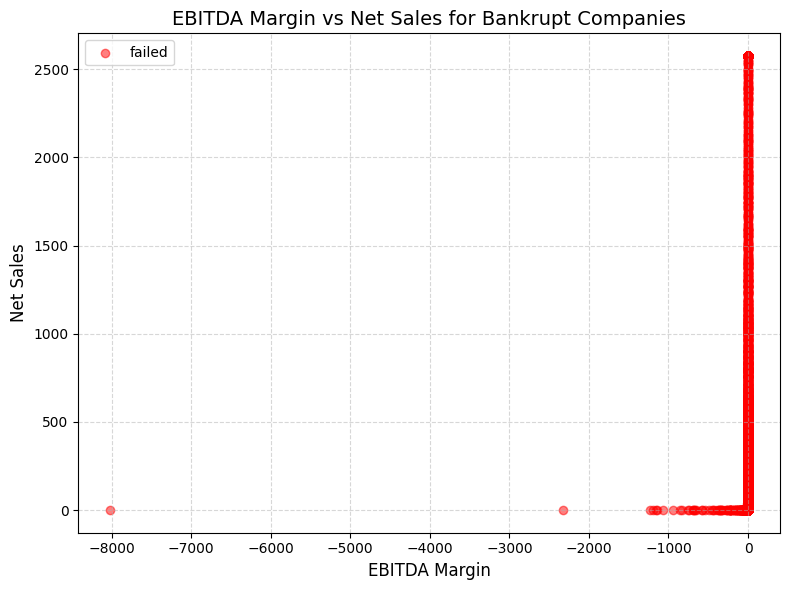

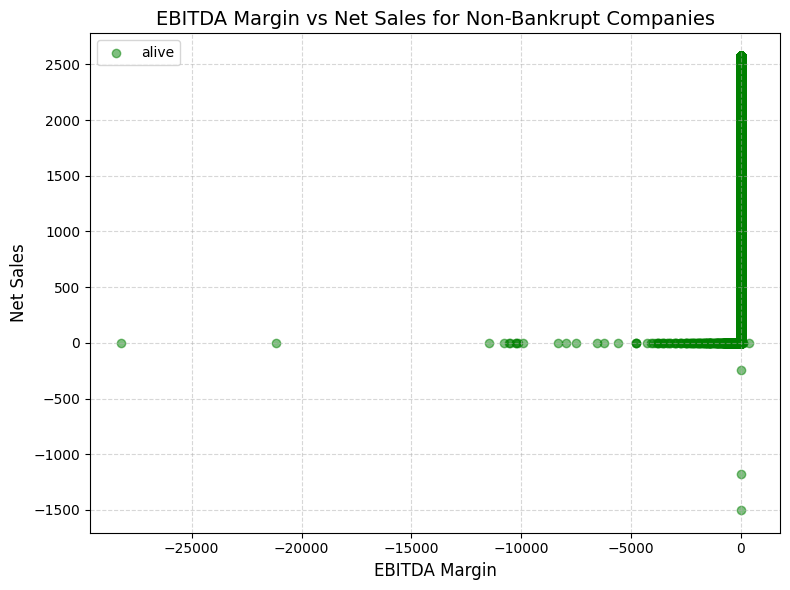

In [ ]:
# Profitability and Growth - EBITDA Margin vs. Net Sales:

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['EBITDA Margin'], df[df['status_label'] == 'failed']['Net Sales'], alpha=0.5, label='failed', c='red')
plt.title('EBITDA Margin vs Net Sales for Bankrupt Companies', fontsize=14)
plt.xlabel('EBITDA Margin', fontsize=12)
plt.ylabel('Net Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['EBITDA Margin'], df[df['status_label'] == 'alive']['Net Sales'], alpha=0.5, label='alive', c='green')
plt.title('EBITDA Margin vs Net Sales for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('EBITDA Margin', fontsize=12)
plt.ylabel('Net Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

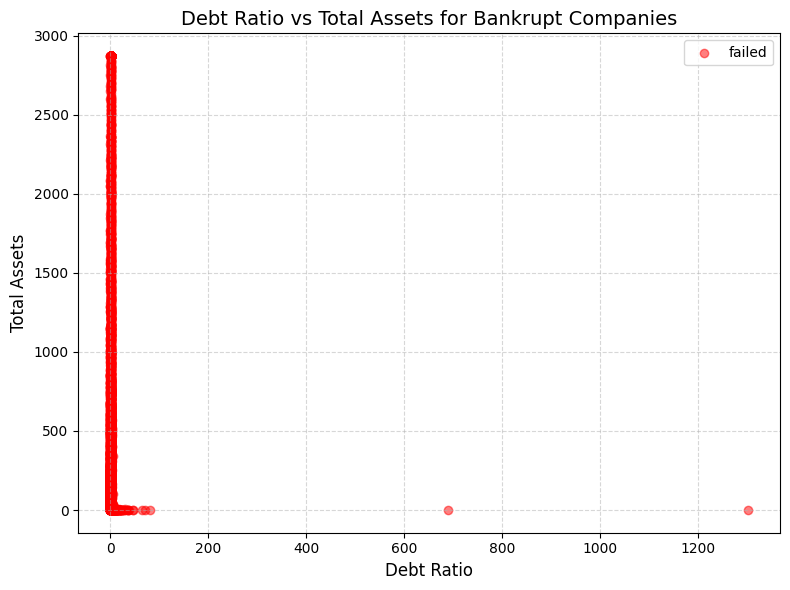

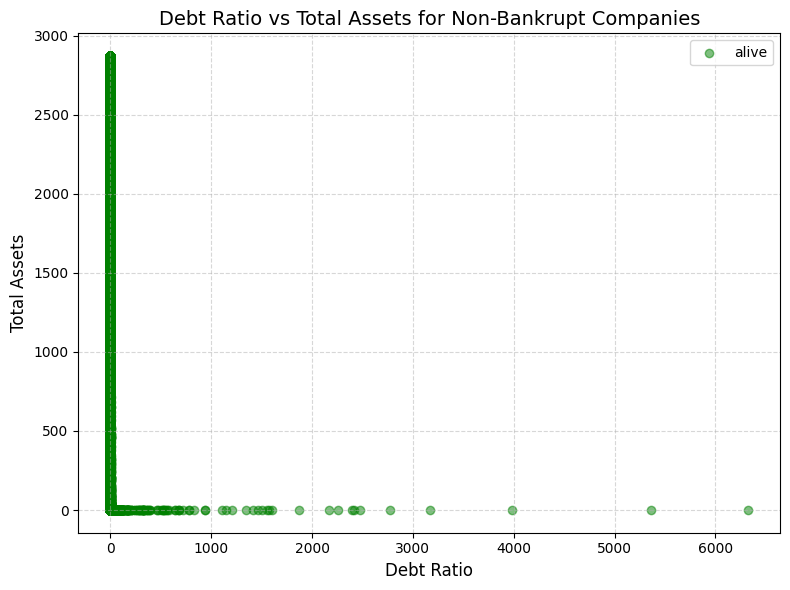

In [ ]:
# Risk Analysis - Debt Ratio vs. Total Assets:

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['Debt Ratio'], df[df['status_label'] == 'failed']['Total Assets'], alpha=0.5, label='failed', c='red')
plt.title('Debt Ratio vs Total Assets for Bankrupt Companies', fontsize=14)
plt.xlabel('Debt Ratio', fontsize=12)
plt.ylabel('Total Assets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['Debt Ratio'], df[df['status_label'] == 'alive']['Total Assets'], alpha=0.5, label='alive', c='green')
plt.title('Debt Ratio vs Total Assets for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('Debt Ratio', fontsize=12)
plt.ylabel('Total Assets', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

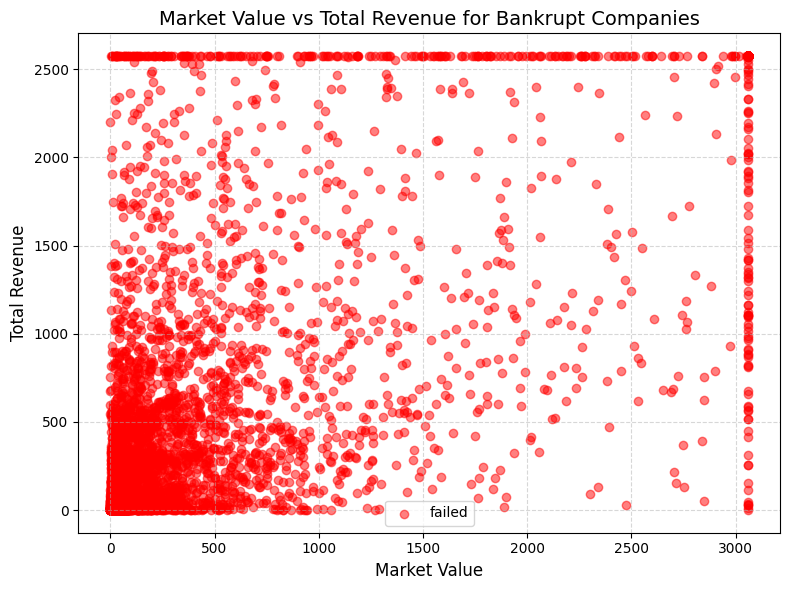

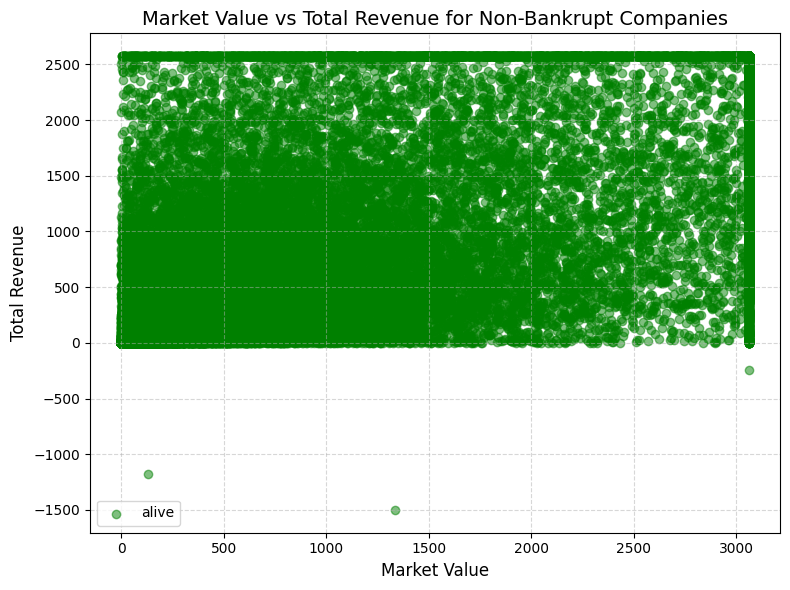

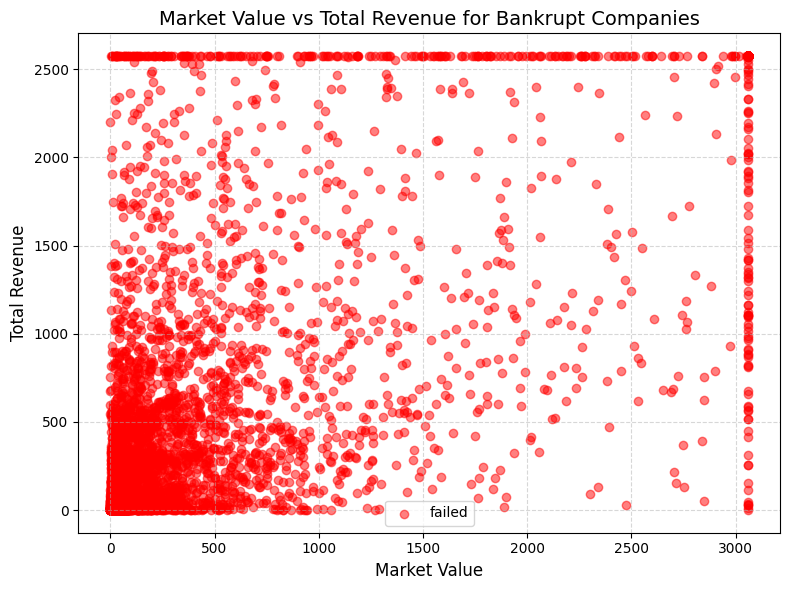

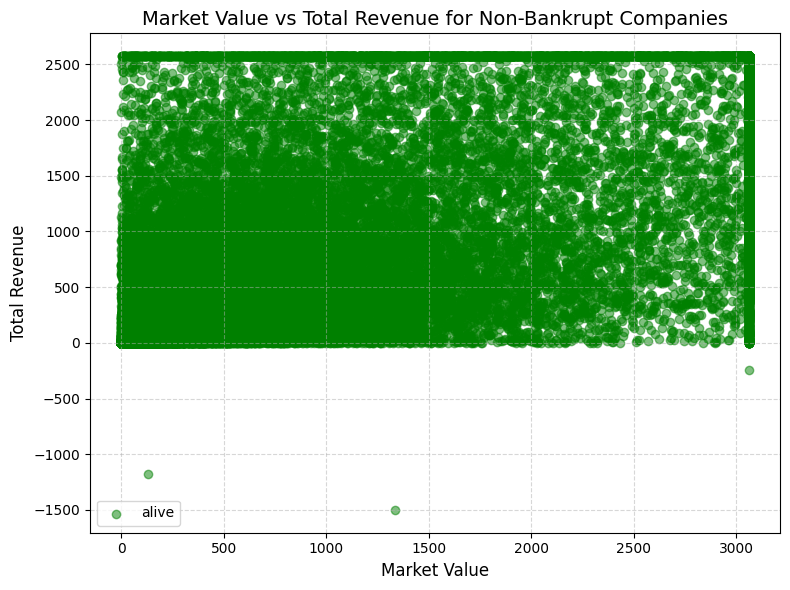

In [ ]:
# Market Performance - Market Value vs. Total Revenue:

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'failed']['Market Value'], df[df['status_label'] == 'failed']['Total Revenue'], alpha=0.5, label='failed', c='red')
plt.title('Market Value vs Total Revenue for Bankrupt Companies', fontsize=14)
plt.xlabel('Market Value', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df[df['status_label'] == 'alive']['Market Value'], df[df['status_label'] == 'alive']['Total Revenue'], alpha=0.5, label='alive', c='green')
plt.title('Market Value vs Total Revenue for Non-Bankrupt Companies', fontsize=14)
plt.xlabel('Market Value', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-23-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-23-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-23-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-23-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

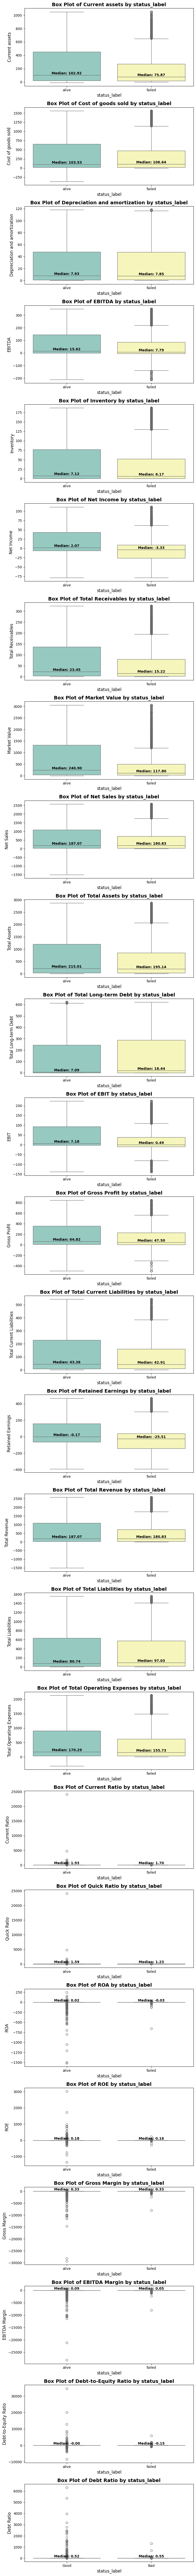

<ipython-input-50-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-50-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-50-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")
<ipython-input-50-5d96983c0332>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and wi

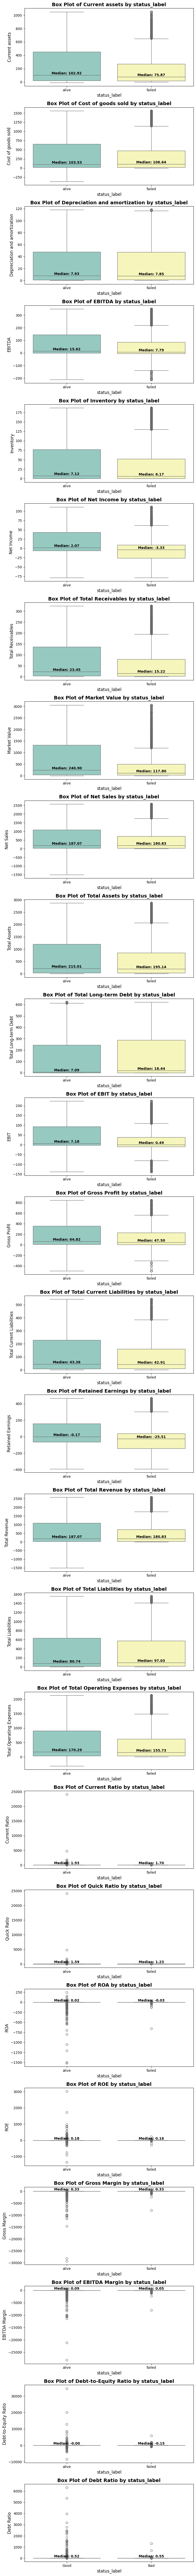

In [ ]:
# Create a list of numeric variables to visualize
numeric_columns = df.columns[3:29]

# Set up a grid of subplots for box plots
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(8, 4 * len(numeric_columns)))
plt.subplots_adjust(hspace=0.5)

# Create box plots for each numeric variable grouped by "status_label"
for i, col in enumerate(numeric_columns):
    sns.boxplot(x="status_label", y=col, data=df, ax=axes[i], palette="Set3")

    # Add median lines and quartile annotations
    median_vals = df.groupby("status_label")[col].median()
    for j, status in enumerate(df["status_label"].unique()):
        axes[i].text(j, median_vals[status], f'Median: {median_vals[status]:.2f}', ha='center', va='bottom', fontsize=10, color='black', weight='bold')

    # Set y-axis labels
    axes[i].set_ylabel(col, fontsize=12)

    # Add plot title
    axes[i].set_title(f'Box Plot of {col} by status_label', fontsize=14, weight='bold')

# Set x-axis labels
for ax in axes:
    ax.set_xlabel("status_label", fontsize=12)

plt.xticks(np.arange(2), labels=["Good", "Bad"], fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
df['status_label'] = df['status_label'].map({'alive': 0, 'failed': 1})

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

df = df.drop(columns=['company_name'])

# Separate features and target variable
X = df.drop(columns=['status_label'])
y = df['status_label']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Check class distribution before applying SMOTE
print("Class distribution in original data:")
print(pd.Series(y_train).value_counts())

# Initialize SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto')

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution in resampled data:")
print(pd.Series(y_train_resampled).value_counts())

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the resampled training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize base models
logistic_regression_model = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warnings
random_forest_model = RandomForestClassifier()
xgb_model = XGBClassifier(probability=True)  # Set probability=True for ROC-AUC calculation

# Train base models on the scaled and resampled data
logistic_regression_model.fit(X_train_resampled_scaled, y_train_resampled)
random_forest_model.fit(X_train_resampled_scaled, y_train_resampled)
xgb_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions on the test data for each model
y_pred_lr = logistic_regression_model.predict(X_test_scaled)
y_pred_rf = random_forest_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate base models
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, xgb_model.predict_proba(X_test_scaled)[:, 1])  # Use xgb_model for ROC-AUC
    print(f"{model_name} Model Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

evaluate_model("Logistic Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


Class distribution in original data:
0    58756
1     4189
Name: status_label, dtype: int64

Class distribution in resampled data:
0    58756
1    58756
Name: status_label, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:24:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "probability" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Model Evaluation:
Accuracy: 0.6256
Precision: 0.1108
Recall: 0.6712
F1-Score: 0.1902
ROC-AUC: 0.8261
Random Forest Model Evaluation:
Accuracy: 0.9224
Precision: 0.4188
Recall: 0.4753
F1-Score: 0.4453
ROC-AUC: 0.8261
XGBoost Model Evaluation:
Accuracy: 0.8446
Precision: 0.2330
Recall: 0.5984
F1-Score: 0.3354
ROC-AUC: 0.8261
Class distribution in original data:
0    58783
1     4162
Name: status_label, dtype: int64

Class distribution in resampled data:
0    58783
1    58783
Name: status_label, dtype: int64


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:28:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "probability" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Model Evaluation:
Accuracy: 0.6248
Precision: 0.1170
Recall: 0.6994
F1-Score: 0.2004
ROC-AUC: 0.8255
Random Forest Model Evaluation:
Accuracy: 0.9183
Precision: 0.4064
Recall: 0.4660
F1-Score: 0.4342
ROC-AUC: 0.8255
XGBoost Model Evaluation:
Accuracy: 0.8415
Precision: 0.2317
Recall: 0.5860
F1-Score: 0.3321
ROC-AUC: 0.8255


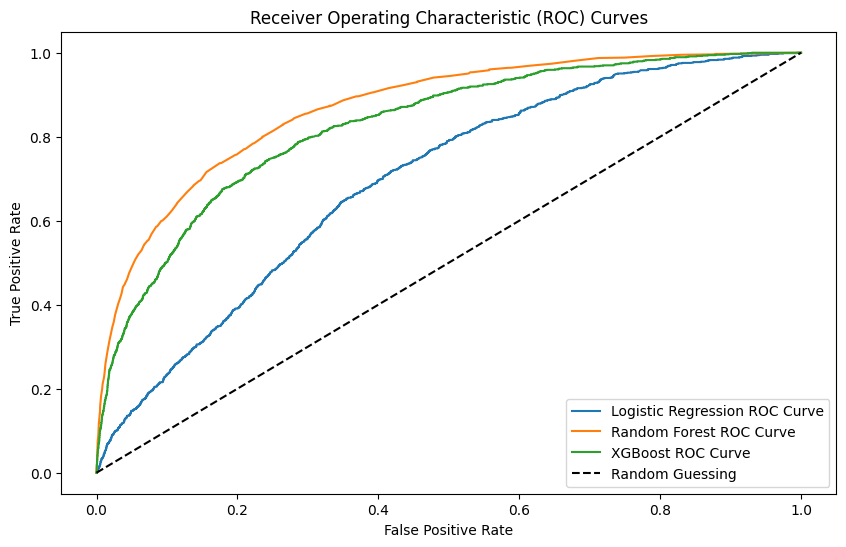

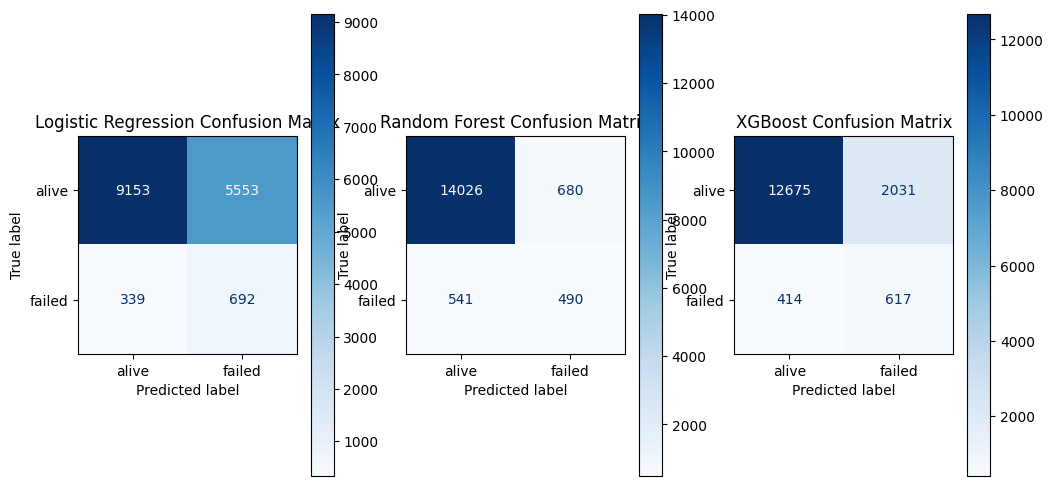

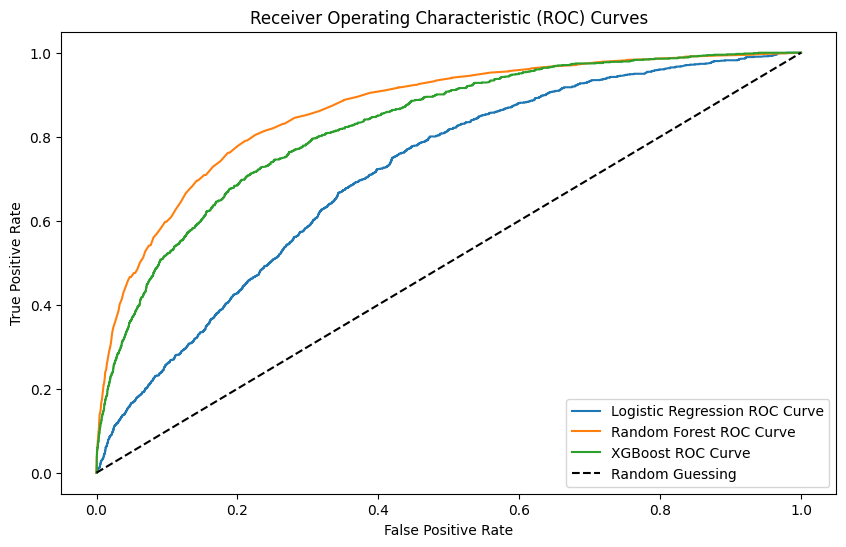

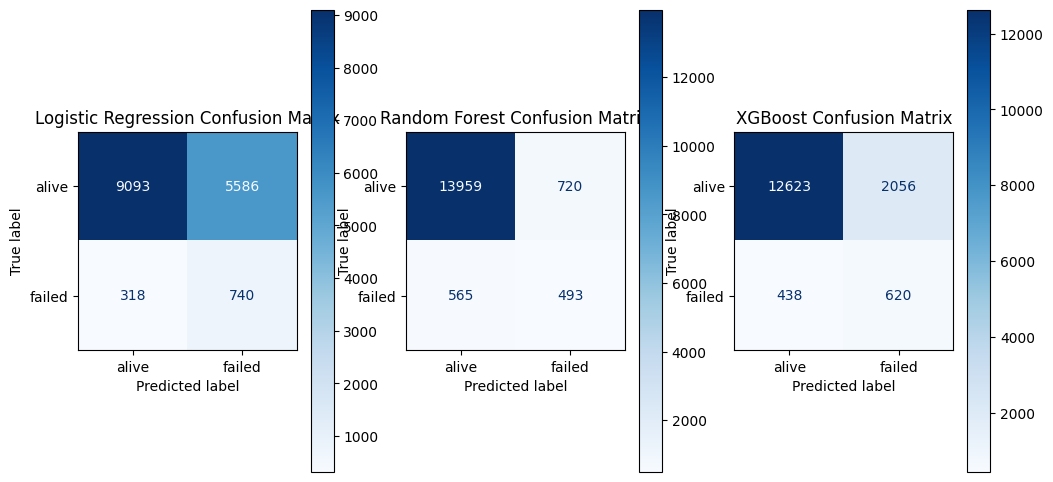

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Function to plot ROC curves for each model
def plot_roc_curves(y_true, y_probs, model_names):
    plt.figure(figsize=(10, 6))
    for i in range(len(model_names)):
        fpr, tpr, thresholds = roc_curve(y_true, y_probs[i][:, 1])
        plt.plot(fpr, tpr, label=f'{model_names[i]} ROC Curve')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curves')
    plt.legend()
    plt.show()

# Plot ROC curves for your models
y_probs = [logistic_regression_model.predict_proba(X_test_scaled),
           random_forest_model.predict_proba(X_test_scaled),
           xgb_model.predict_proba(X_test_scaled)]

model_names = ["Logistic Regression", "Random Forest", "XGBoost"]
plot_roc_curves(y_test, y_probs, model_names)

# Function to plot confusion matrices for each model
def plot_confusion_matrices(y_true, y_pred, model_names):
    plt.figure(figsize=(12, 6))
    for i in range(len(model_names)):
        cm = confusion_matrix(y_true, y_pred[i])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["alive", "failed"])
        disp.plot(cmap='Blues', ax=plt.subplot(1, len(model_names), i + 1))
        plt.title(f'{model_names[i]} Confusion Matrix')

# Plot confusion matrices for your models
y_preds = [y_pred_lr, y_pred_rf, y_pred_xgb]
plot_confusion_matrices(y_test, y_preds, model_names)


In [ ]:
# Install LightGBM
!pip install lightgbm

# Import LightGBM and train the model
import lightgbm as lgb

# Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model
lgb_model.fit(X_train_resampled_scaled, y_train_resampled)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test_scaled)

# Evaluate the LightGBM model
evaluate_model("LightGBM", y_test, y_pred_lgb)

[LightGBM] [Info] Number of positive: 58756, number of negative: 58756
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6651
[LightGBM] [Info] Number of data points in the train set: 117512, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Model Evaluation:
Accuracy: 0.7722
Precision: 0.1666
Recall: 0.6188
F1-Score: 0.2625
ROC-AUC: 0.8261
[LightGBM] [Info] Number of positive: 58783, number of negative: 58783
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6651
[LightGBM] [Info] Number of data points in the train set: 117566, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM M

Epoch 1/10
2938/2938 - 13s - loss: 0.5388 - accuracy: 0.7116 - val_loss: 0.8185 - val_accuracy: 0.4551 - 13s/epoch - 4ms/step
Epoch 2/10
2938/2938 - 7s - loss: 0.5070 - accuracy: 0.7343 - val_loss: 0.7405 - val_accuracy: 0.5420 - 7s/epoch - 2ms/step
Epoch 3/10
2938/2938 - 4s - loss: 0.4886 - accuracy: 0.7470 - val_loss: 0.6499 - val_accuracy: 0.6182 - 4s/epoch - 1ms/step
Epoch 4/10
2938/2938 - 4s - loss: 0.4754 - accuracy: 0.7566 - val_loss: 0.6434 - val_accuracy: 0.6386 - 4s/epoch - 1ms/step
Epoch 5/10
2938/2938 - 3s - loss: 0.4621 - accuracy: 0.7647 - val_loss: 0.6482 - val_accuracy: 0.6135 - 3s/epoch - 1ms/step
Epoch 6/10
2938/2938 - 4s - loss: 0.4514 - accuracy: 0.7719 - val_loss: 0.6174 - val_accuracy: 0.6329 - 4s/epoch - 1ms/step
Epoch 7/10
2938/2938 - 4s - loss: 0.4431 - accuracy: 0.7762 - val_loss: 0.6077 - val_accuracy: 0.6329 - 4s/epoch - 1ms/step
Epoch 8/10
2938/2938 - 3s - loss: 0.4351 - accuracy: 0.7821 - val_loss: 0.6199 - val_accuracy: 0.6959 - 3s/epoch - 1ms/step
Epoch 

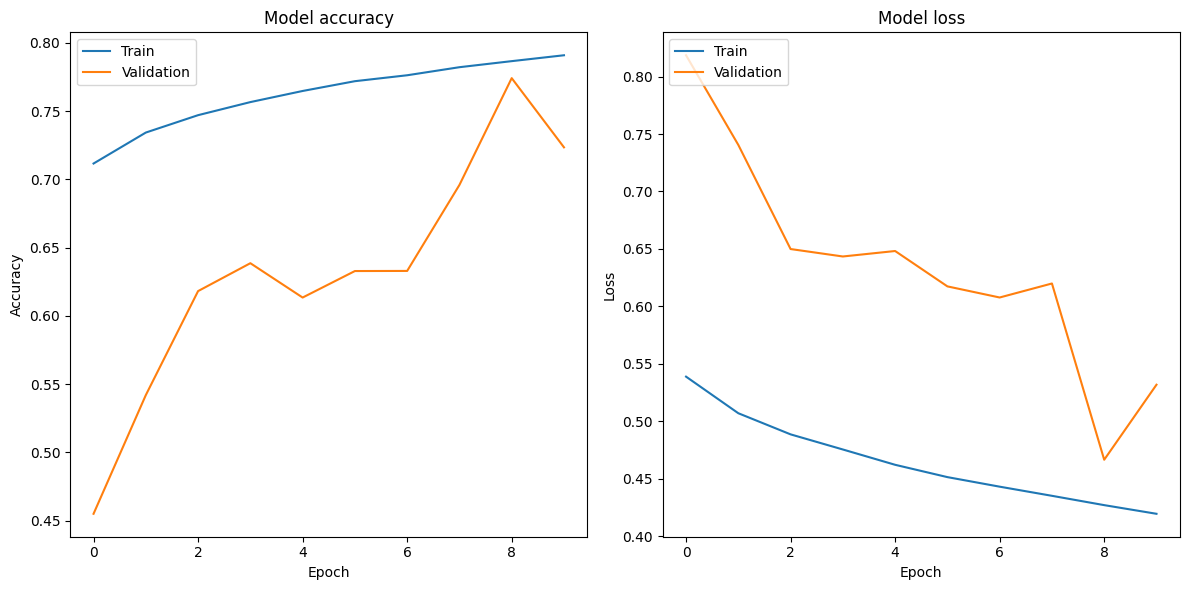

492/492 [==============================] - 0s 844us/step
Neural Network (TensorFlow) Model Evaluation:
Accuracy: 0.8232
Precision: 0.1974
Recall: 0.5538
F1-Score: 0.2910
ROC-AUC: 0.8261
Epoch 1/10
2940/2940 - 8s - loss: 0.5408 - accuracy: 0.7101 - val_loss: 0.7227 - val_accuracy: 0.5257 - 8s/epoch - 3ms/step
Epoch 2/10
2940/2940 - 8s - loss: 0.5088 - accuracy: 0.7345 - val_loss: 0.6605 - val_accuracy: 0.5948 - 8s/epoch - 3ms/step
Epoch 3/10
2940/2940 - 6s - loss: 0.4922 - accuracy: 0.7433 - val_loss: 0.6281 - val_accuracy: 0.6372 - 6s/epoch - 2ms/step
Epoch 4/10
2940/2940 - 4s - loss: 0.4771 - accuracy: 0.7538 - val_loss: 0.6212 - val_accuracy: 0.6745 - 4s/epoch - 1ms/step
Epoch 5/10
2940/2940 - 4s - loss: 0.4659 - accuracy: 0.7605 - val_loss: 0.6506 - val_accuracy: 0.6274 - 4s/epoch - 1ms/step
Epoch 6/10
2940/2940 - 4s - loss: 0.4546 - accuracy: 0.7676 - val_loss: 0.6548 - val_accuracy: 0.5967 - 4s/epoch - 1ms/step
Epoch 7/10
2940/2940 - 4s - loss: 0.4463 - accuracy: 0.7739 - val_loss

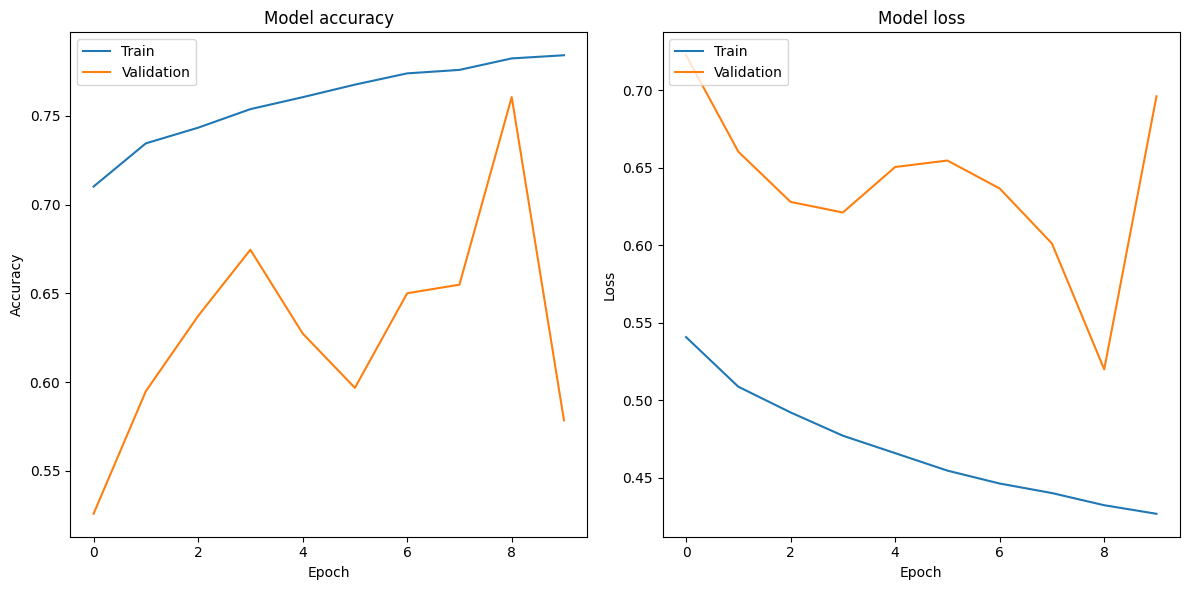

492/492 [==============================] - 1s 1ms/step
Neural Network (TensorFlow) Model Evaluation:
Accuracy: 0.8736
Precision: 0.2427
Recall: 0.4149
F1-Score: 0.3062
ROC-AUC: 0.8255


In [ ]:
# Install TensorFlow
!pip install tensorflow

# Import TensorFlow and other necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define and train a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and save the history
history = model.fit(X_train_resampled_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=2, validation_split=0.2)

# Plotting training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot graphs
plot_training_history(history)

# Make predictions
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)

# Evaluate the neural network model
# Assuming 'evaluate_model' is a function you've defined elsewhere to print or plot your evaluation metrics
evaluate_model("Neural Network (TensorFlow)", y_test, y_pred_nn)


492/492 [==============================] - 0s 901us/step


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

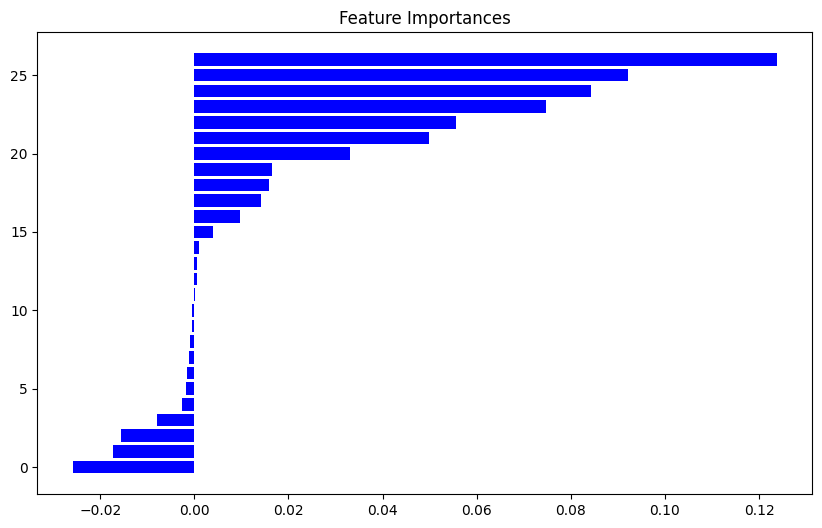

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

def permutation_importance(model, X_test, y_test, metric=accuracy_score):
    baseline_performance = metric(y_test, model.predict(X_test) > 0.5)
    importance_scores = []
    for i in range(X_test.shape[1]):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[:, i] = shuffle(X_test_shuffled[:, i])
        shuffled_score = metric(y_test, model.predict(X_test_shuffled) > 0.5)
        importance = baseline_performance - shuffled_score
        importance_scores.append(importance)
    return np.array(importance_scores)

# Assuming X_test_scaled and y_test are your test set features and labels
importances = permutation_importance(model, X_test_scaled, y_test)

# Plotting feature importance
plt.figure(figsize=(10, 6))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_test_scaled.columns[i] for i in indices])  # Assuming X_test_scaled is a DataFrame
plt.xlabel('Relative Importance')
plt.show()


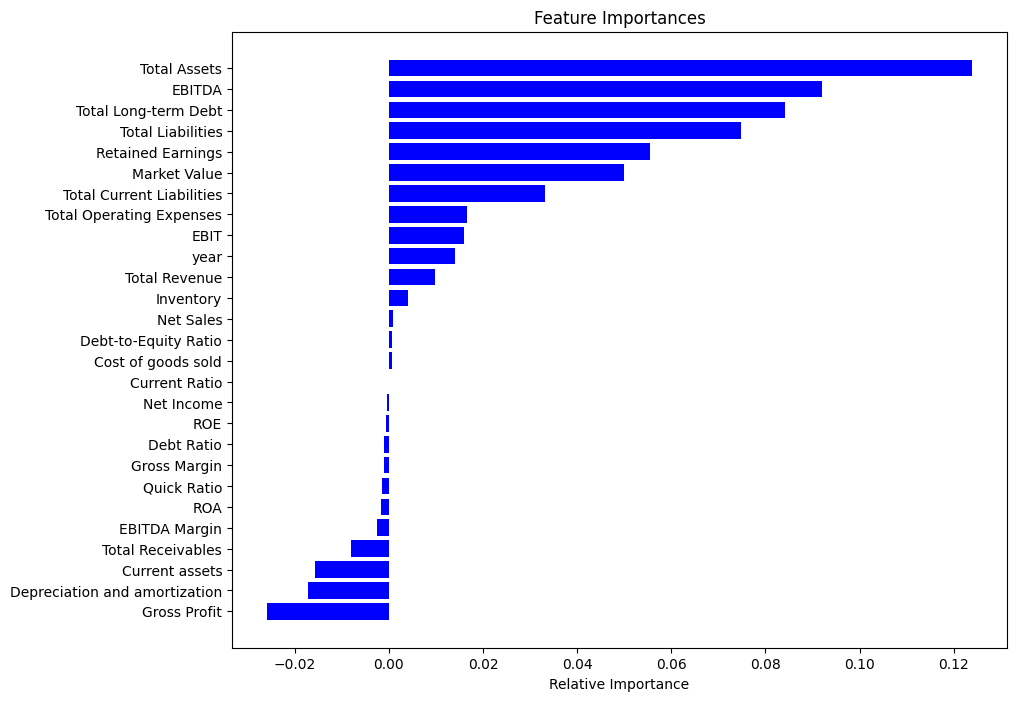

In [ ]:
# Assuming `feature_names` is a list of your column names before converting to numpy array
feature_names = ['year', 'Current assets', 'Cost of goods sold', 'Depreciation and amortization', 'EBITDA', 'Inventory', 'Net Income', 'Total Receivables', 'Market Value', 'Net Sales', 'Total Assets', 'Total Long-term Debt', 'EBIT', 'Gross Profit', 'Total Current Liabilities', 'Retained Earnings', 'Total Revenue', 'Total Liabilities', 'Total Operating Expenses', 'Current Ratio', 'Quick Ratio', 'ROA', 'ROE', 'Gross Margin', 'EBITDA Margin', 'Debt-to-Equity Ratio', 'Debt Ratio']

plt.figure(figsize=(10, 8))
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
